In [161]:
import numpy as np

In [162]:
A = np.array([[2,4],[1,3],[0,0],[0,0]])
W = np.dot(A.T,A)
w, v = np.linalg.eig(W)
print('特征值：{}\n特征向量：{}'.format(w,v))

U,S,V = np.linalg.svd(A)
print(U,S,V)

特征值：[ 0.13393125 29.86606875]
特征向量：[[-0.9145143  -0.40455358]
 [ 0.40455358 -0.9145143 ]]
[[-0.81741556 -0.57604844  0.          0.        ]
 [-0.57604844  0.81741556  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]] [5.4649857  0.36596619] [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]


In [163]:
sigma1 = np.sqrt(w[0])
sigma2 = np.sqrt(w[1])
print(1/sigma1,1/sigma2)

miu1 = 1/sigma1 *np.dot(A,v[0].T)
miu2 = 1/sigma2 *np.dot(A,v[1].T)
print(np.dot(A,v[0].T))
print(miu1,miu2)


2.732492852109545 0.18298309531312892
[-3.44724293 -2.12817505  0.          0.        ]
[-9.41956667 -5.81522311  0.          0.        ] [-0.52130969 -0.4279955   0.          0.        ]


In [164]:
U = np.array([[-9.42,-0.52,0,0],[-5.8,-0.43,0,0],[0,0,1,0],[0,0,0,1]])
Sigma = np.array([[5.47,0],[0,0.36],[0,0],[0,0]])
V = np.array([[-0.91,-0.40],[0.40,-0.91]])
print(np.dot(np.dot(U,Sigma),V.T))



[[ 46.964814 -20.440608]
 [ 28.93258  -12.549532]
 [  0.         0.      ]
 [  0.         0.      ]]


In [196]:
from csv import reader
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


filename = 'iris.csv'
# 读入csv数据
with open(filename, 'rt', encoding='UTF-8') as raw_data:
    readers = reader(raw_data, delimiter=',')
    x = list(readers)
    data = np.array(x)
    

# 属性名称 和 三种花的数据
title = data[0]
flower = ["Setosa","Versicolor","Virginica"]
data =data[1:151]
Set=[]
Ver=[]
Vir=[]

for i in data:
    if i[4]=='Setosa':
        Set.append(i[0:4].astype(float))
    if i[4]=='Versicolor':
        Ver.append(i[0:4].astype(float))
    if i[4]=='Virginica':
        Vir.append(i[0:4].astype(float))
Set = np.asarray(Set)
Ver = np.asarray(Ver)
Vir = np.asarray(Vir)
# print(len(Set),len(Ver),len(Vir))

# 四种属性的值
slen = data[:,0].astype(float)
swid = data[:,1].astype(float)
plen = data[:,2].astype(float)
pwid = data[:,3].astype(float)
# print(len(slen),len(swid),len(plen),len(pwid))

In [166]:
# 五数概括函数
def fiveNumber(nums):
	#五数概括 Minimum（最小值）、Q1、Median（中位数、）、Q3、Maximum（最大值）
	Minimum=min(nums)
	Maximum=max(nums)
	Q1=np.percentile(nums,25)
	Median=np.median(nums)
	Q3=np.percentile(nums,75)
	
	IQR=Q3-Q1
	lower_limit=Q1-1.5*IQR #下限值
	upper_limit=Q3+1.5*IQR #上限值
	
	return Minimum,Q1,Median,Q3,Maximum,lower_limit,upper_limit

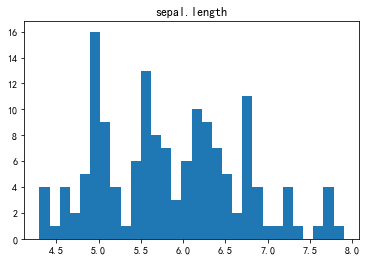

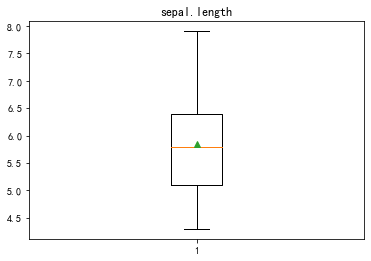

(4.3, 5.1, 5.8, 6.4, 7.9, 3.1499999999999986, 8.350000000000001)


In [167]:
# 某个属性的分布图和盒图
plt.hist(slen,bins=30)
plt.title("sepal.length")
plt.show()

plt.boxplot(slen,showmeans=True)
plt.title("sepal.length")
plt.show()

print(fiveNumber(slen))

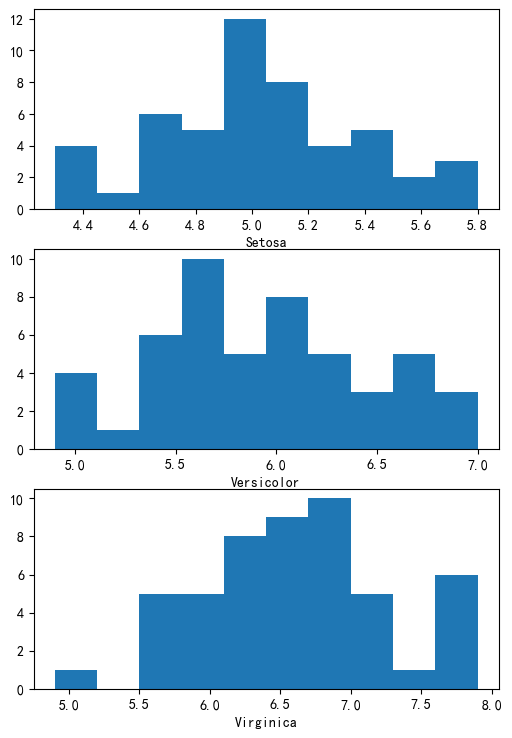

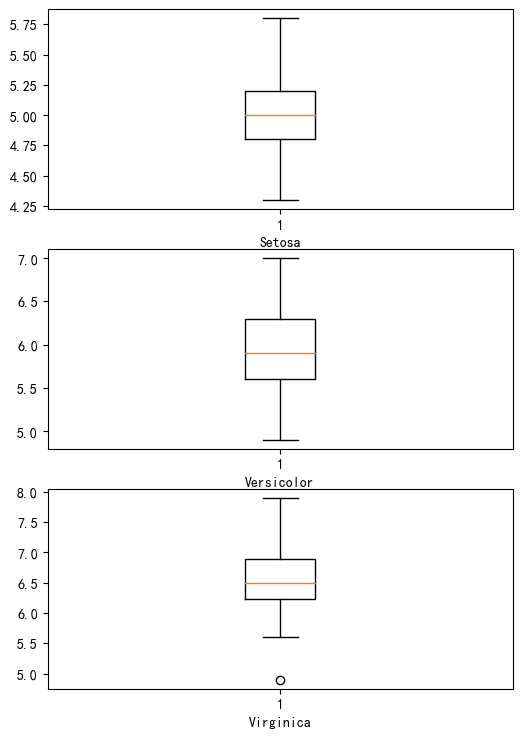

In [197]:
# 分布直方图
plt.figure(dpi=100,figsize=(6,9))
plt.subplot(3,1,1)
plt.hist(Set[:,0],bins=10)
plt.xlabel(flower[0])
plt.subplot(3,1,2)
plt.hist(Ver[:,0],bins=10)
plt.xlabel(flower[1])
plt.subplot(3,1,3)
plt.hist(Vir[:,0],bins=10)
plt.xlabel(flower[2])
plt.show()

# 盒图
plt.figure(dpi=100,figsize=(6,9))
plt.subplot(3,1,1)
plt.boxplot(Set[:,0])
plt.xlabel(flower[0])
plt.subplot(3,1,2)
plt.boxplot(Ver[:,0])
plt.xlabel(flower[1])
plt.subplot(3,1,3)
plt.boxplot(Vir[:,0])
plt.xlabel(flower[2])
plt.show()

<Figure size 1200x1200 with 0 Axes>

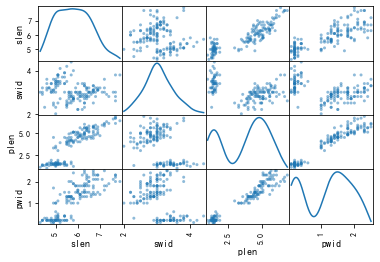

协方差矩阵:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
Person矩阵:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [199]:
# 四属性之间的散点图，person,协方差

df = pd.DataFrame(np.asarray([slen, swid, plen, pwid]).T,columns=['slen', 'swid', 'plen','pwid'])
# 绘制散点图矩阵
plt.figure(dpi=100,figsize=(12,12))
pd.plotting.scatter_matrix(df, diagonal='kde')
plt.show()

# 计算协方差，person矩阵
X = np.vstack((slen,swid,plen,pwid))
# X每行代表一个属性
#  每列代表一个示例，或者说观测
print("协方差矩阵:")
print(np.cov(X))
print("Person矩阵:")
print(np.corrcoef(X))

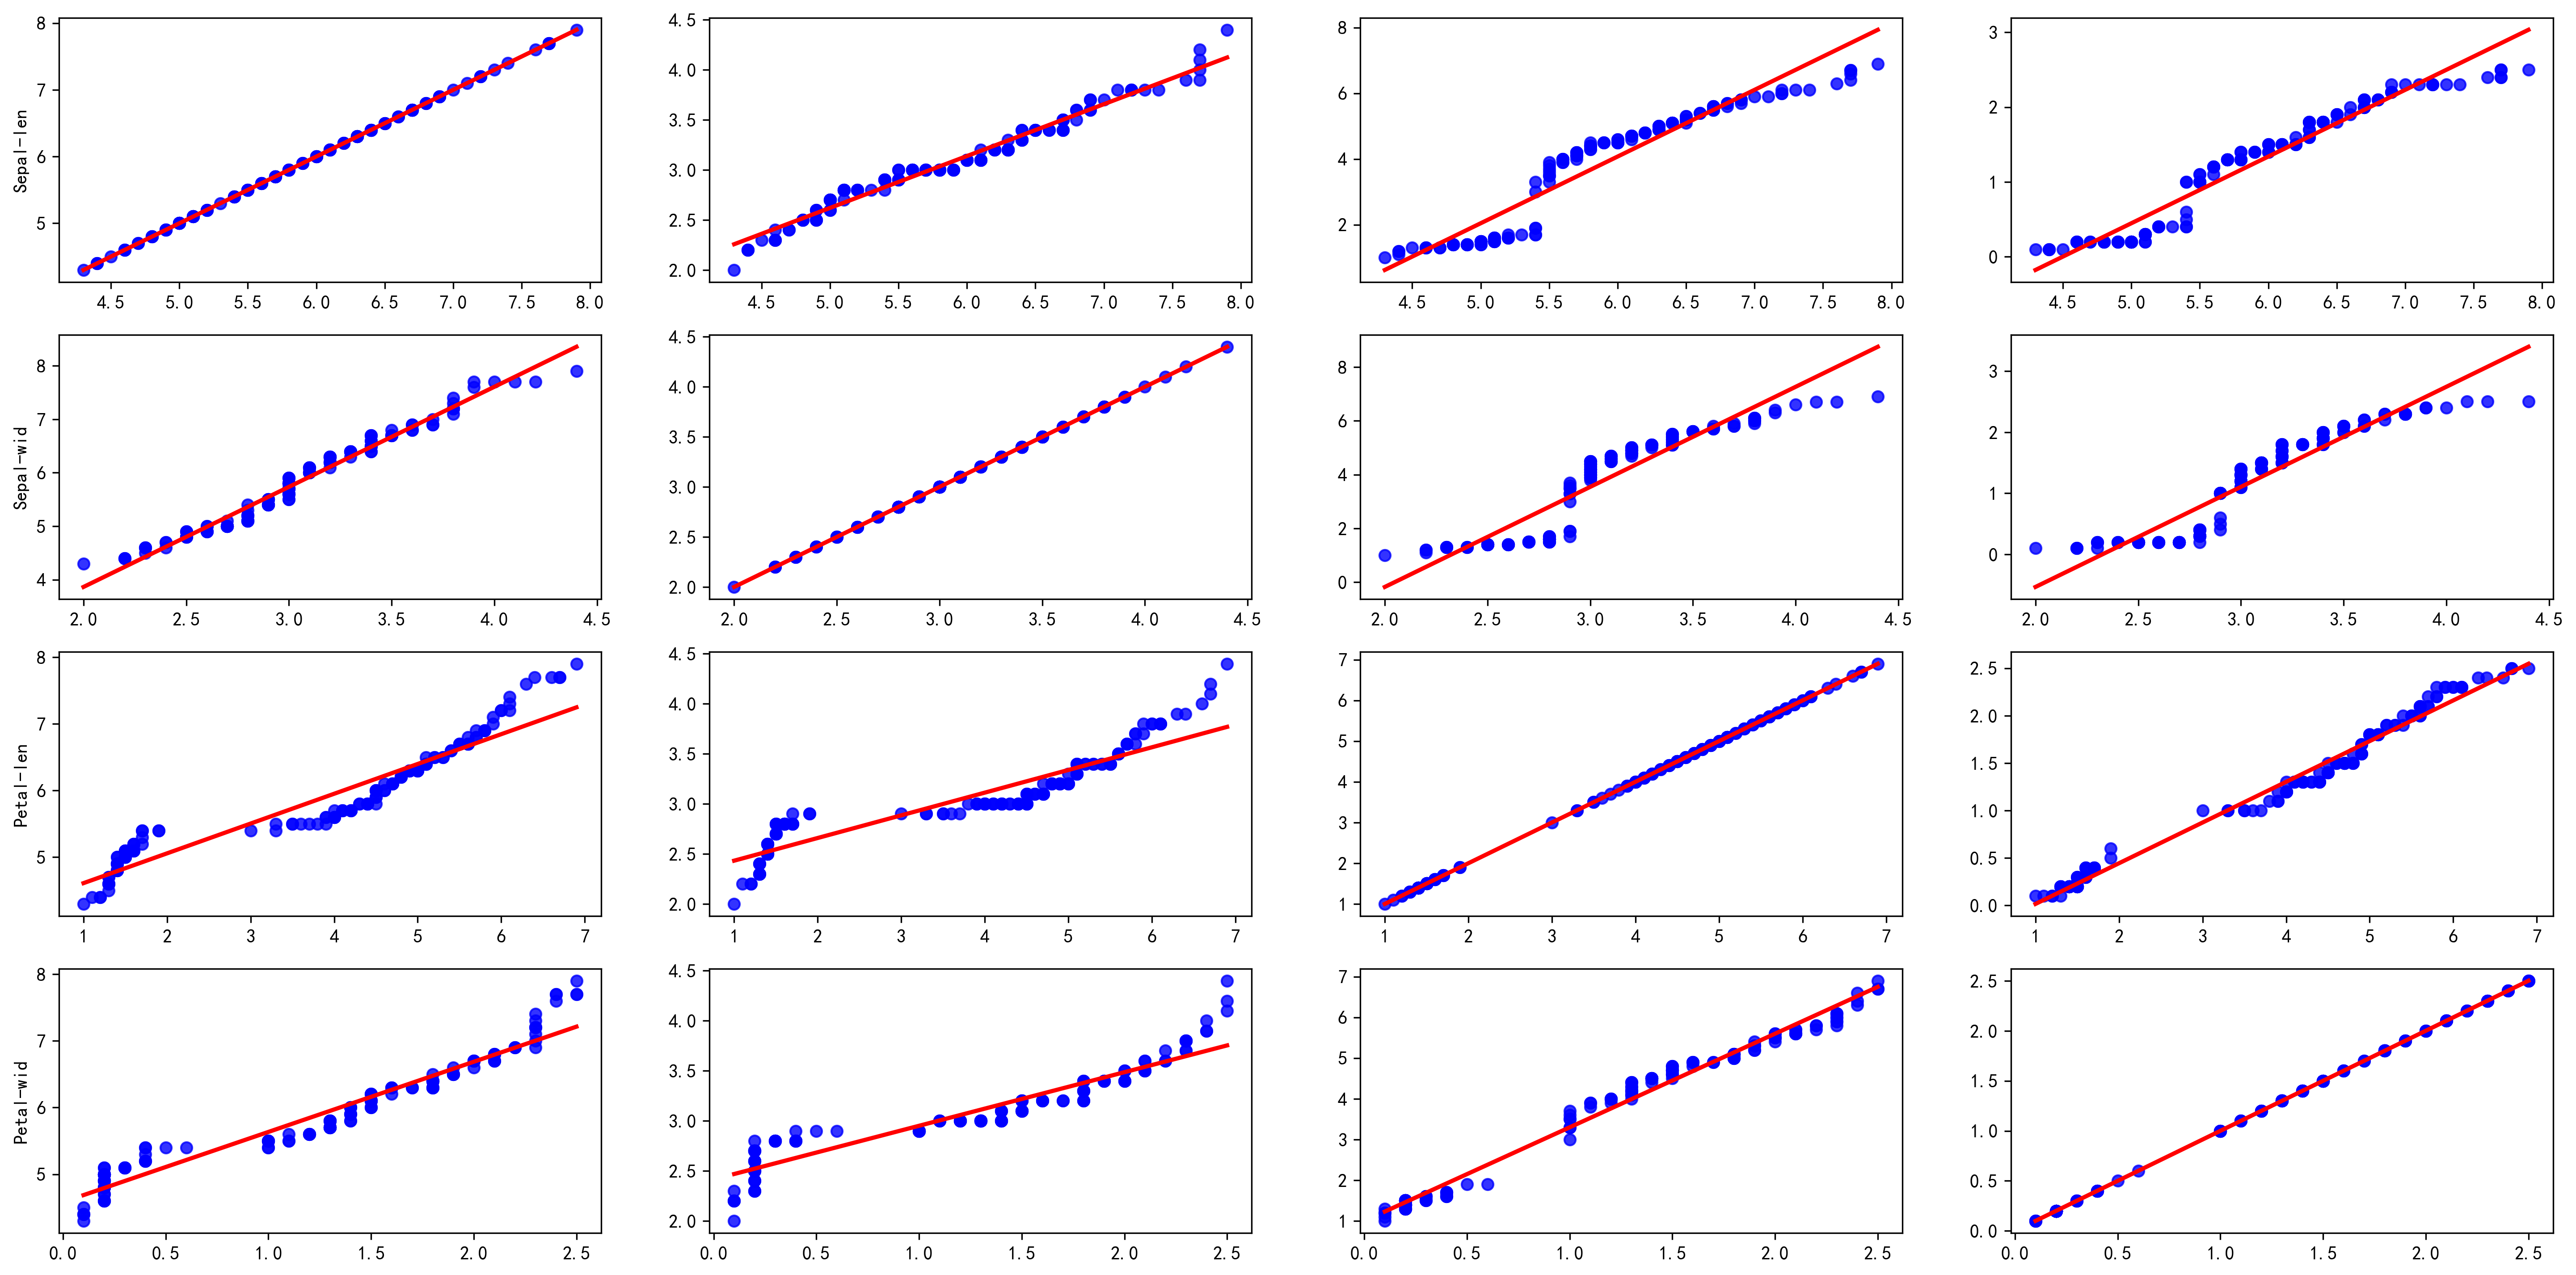

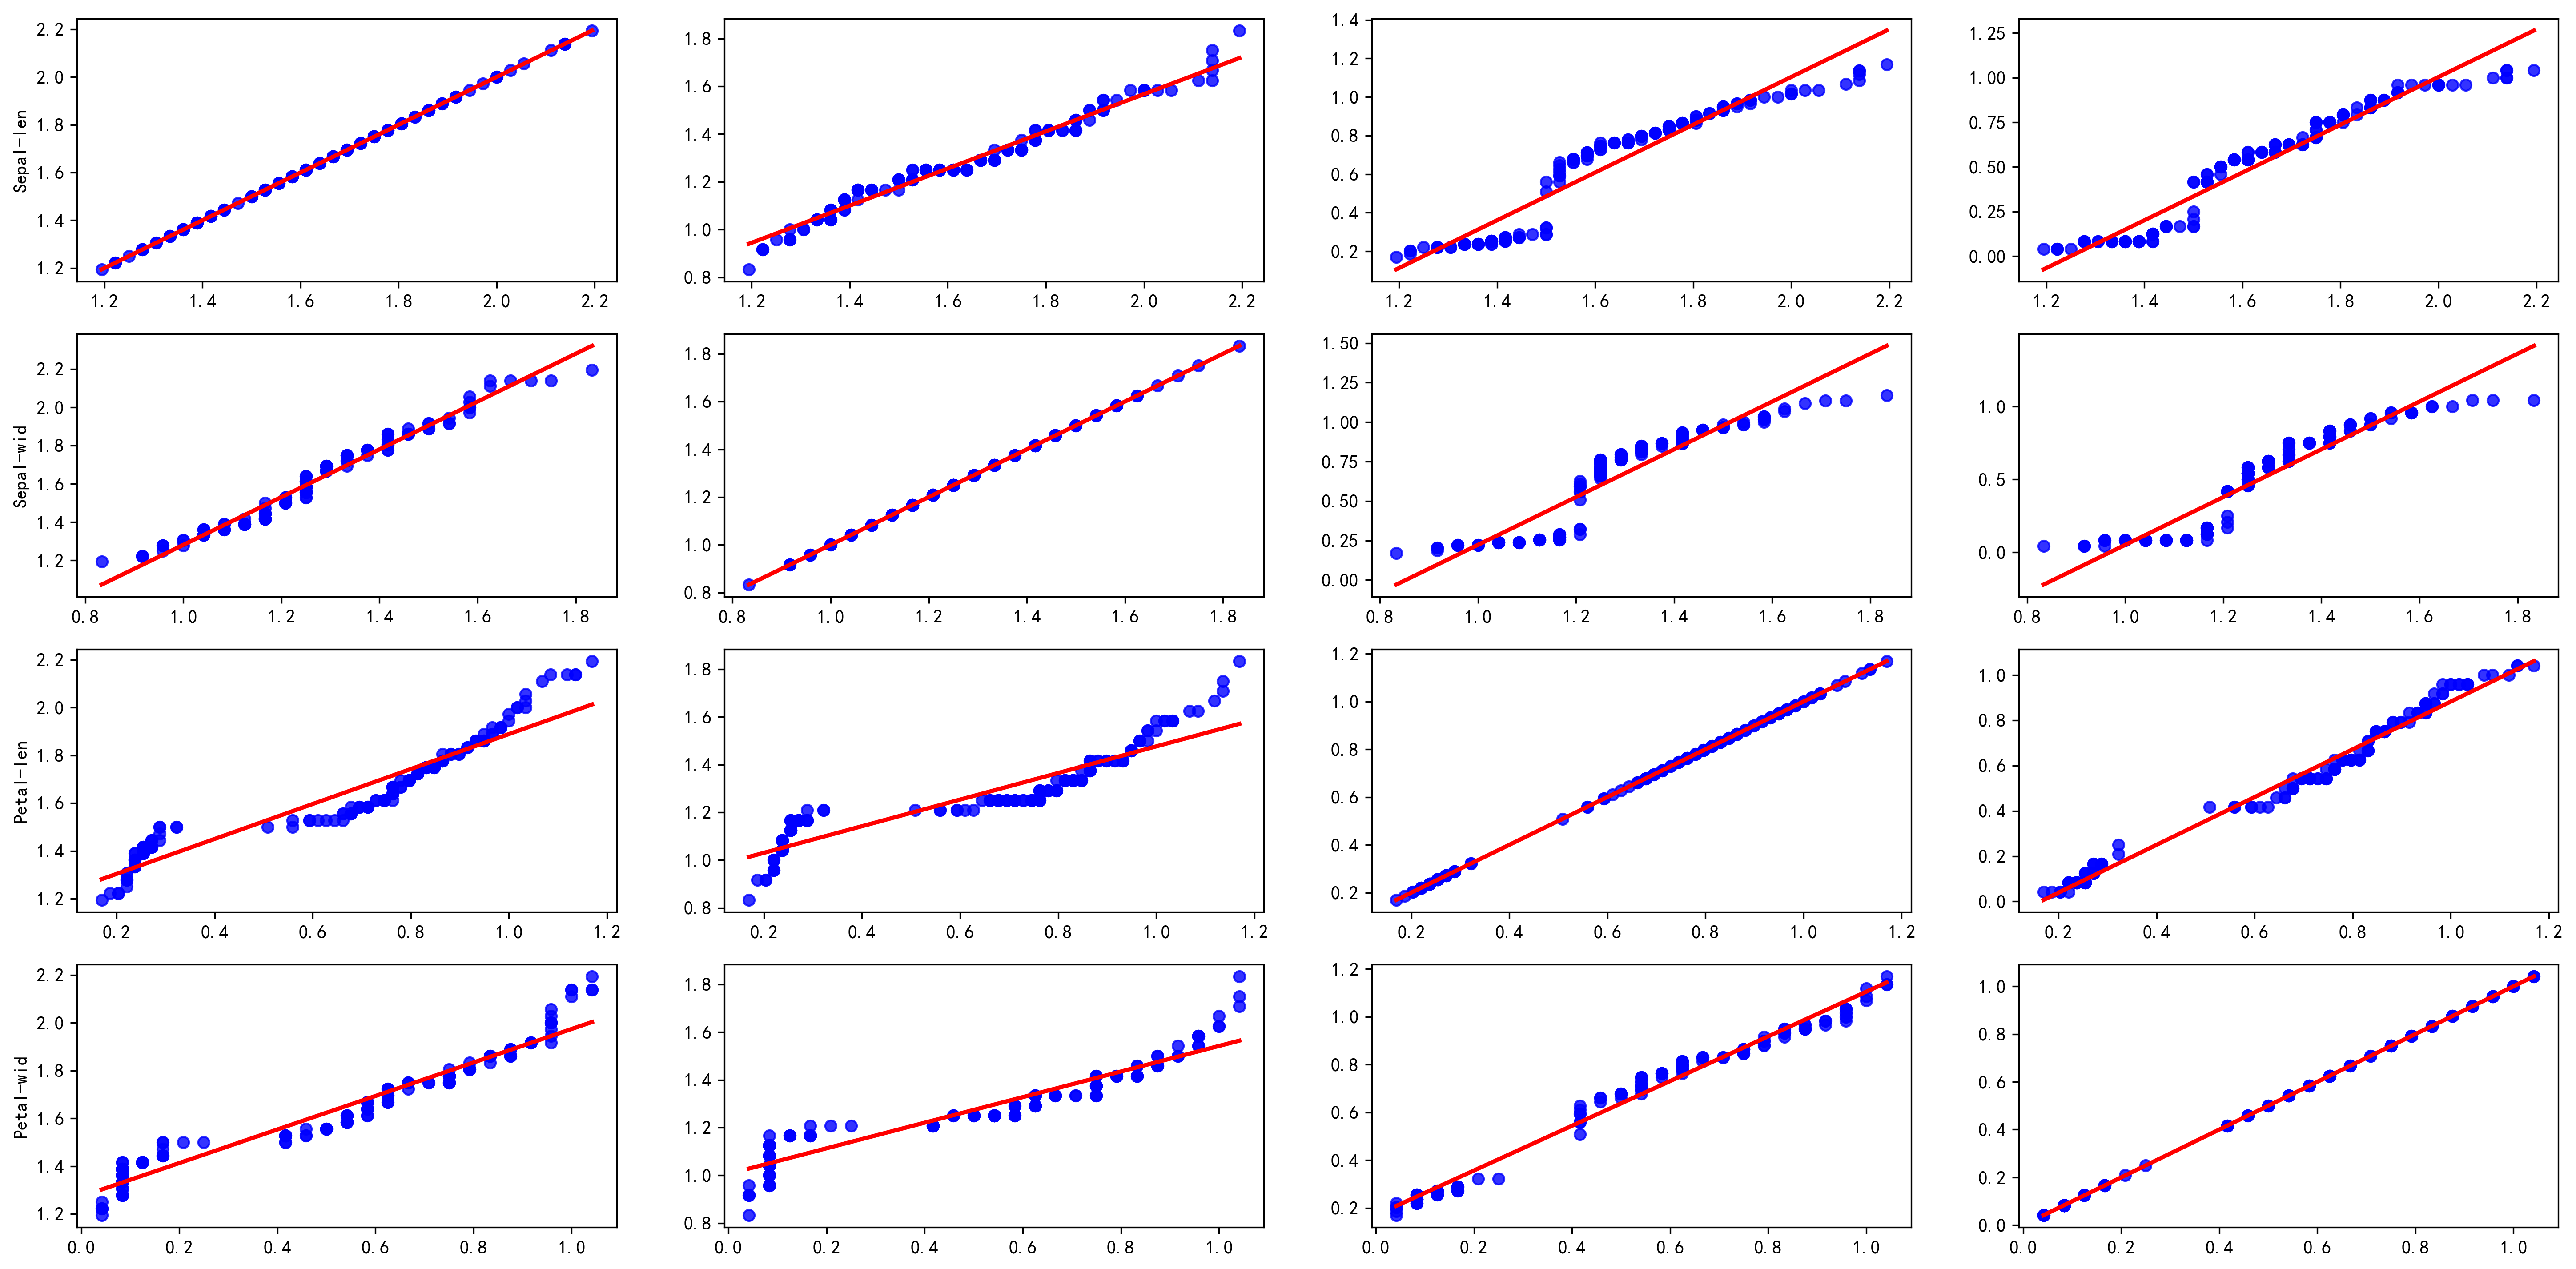

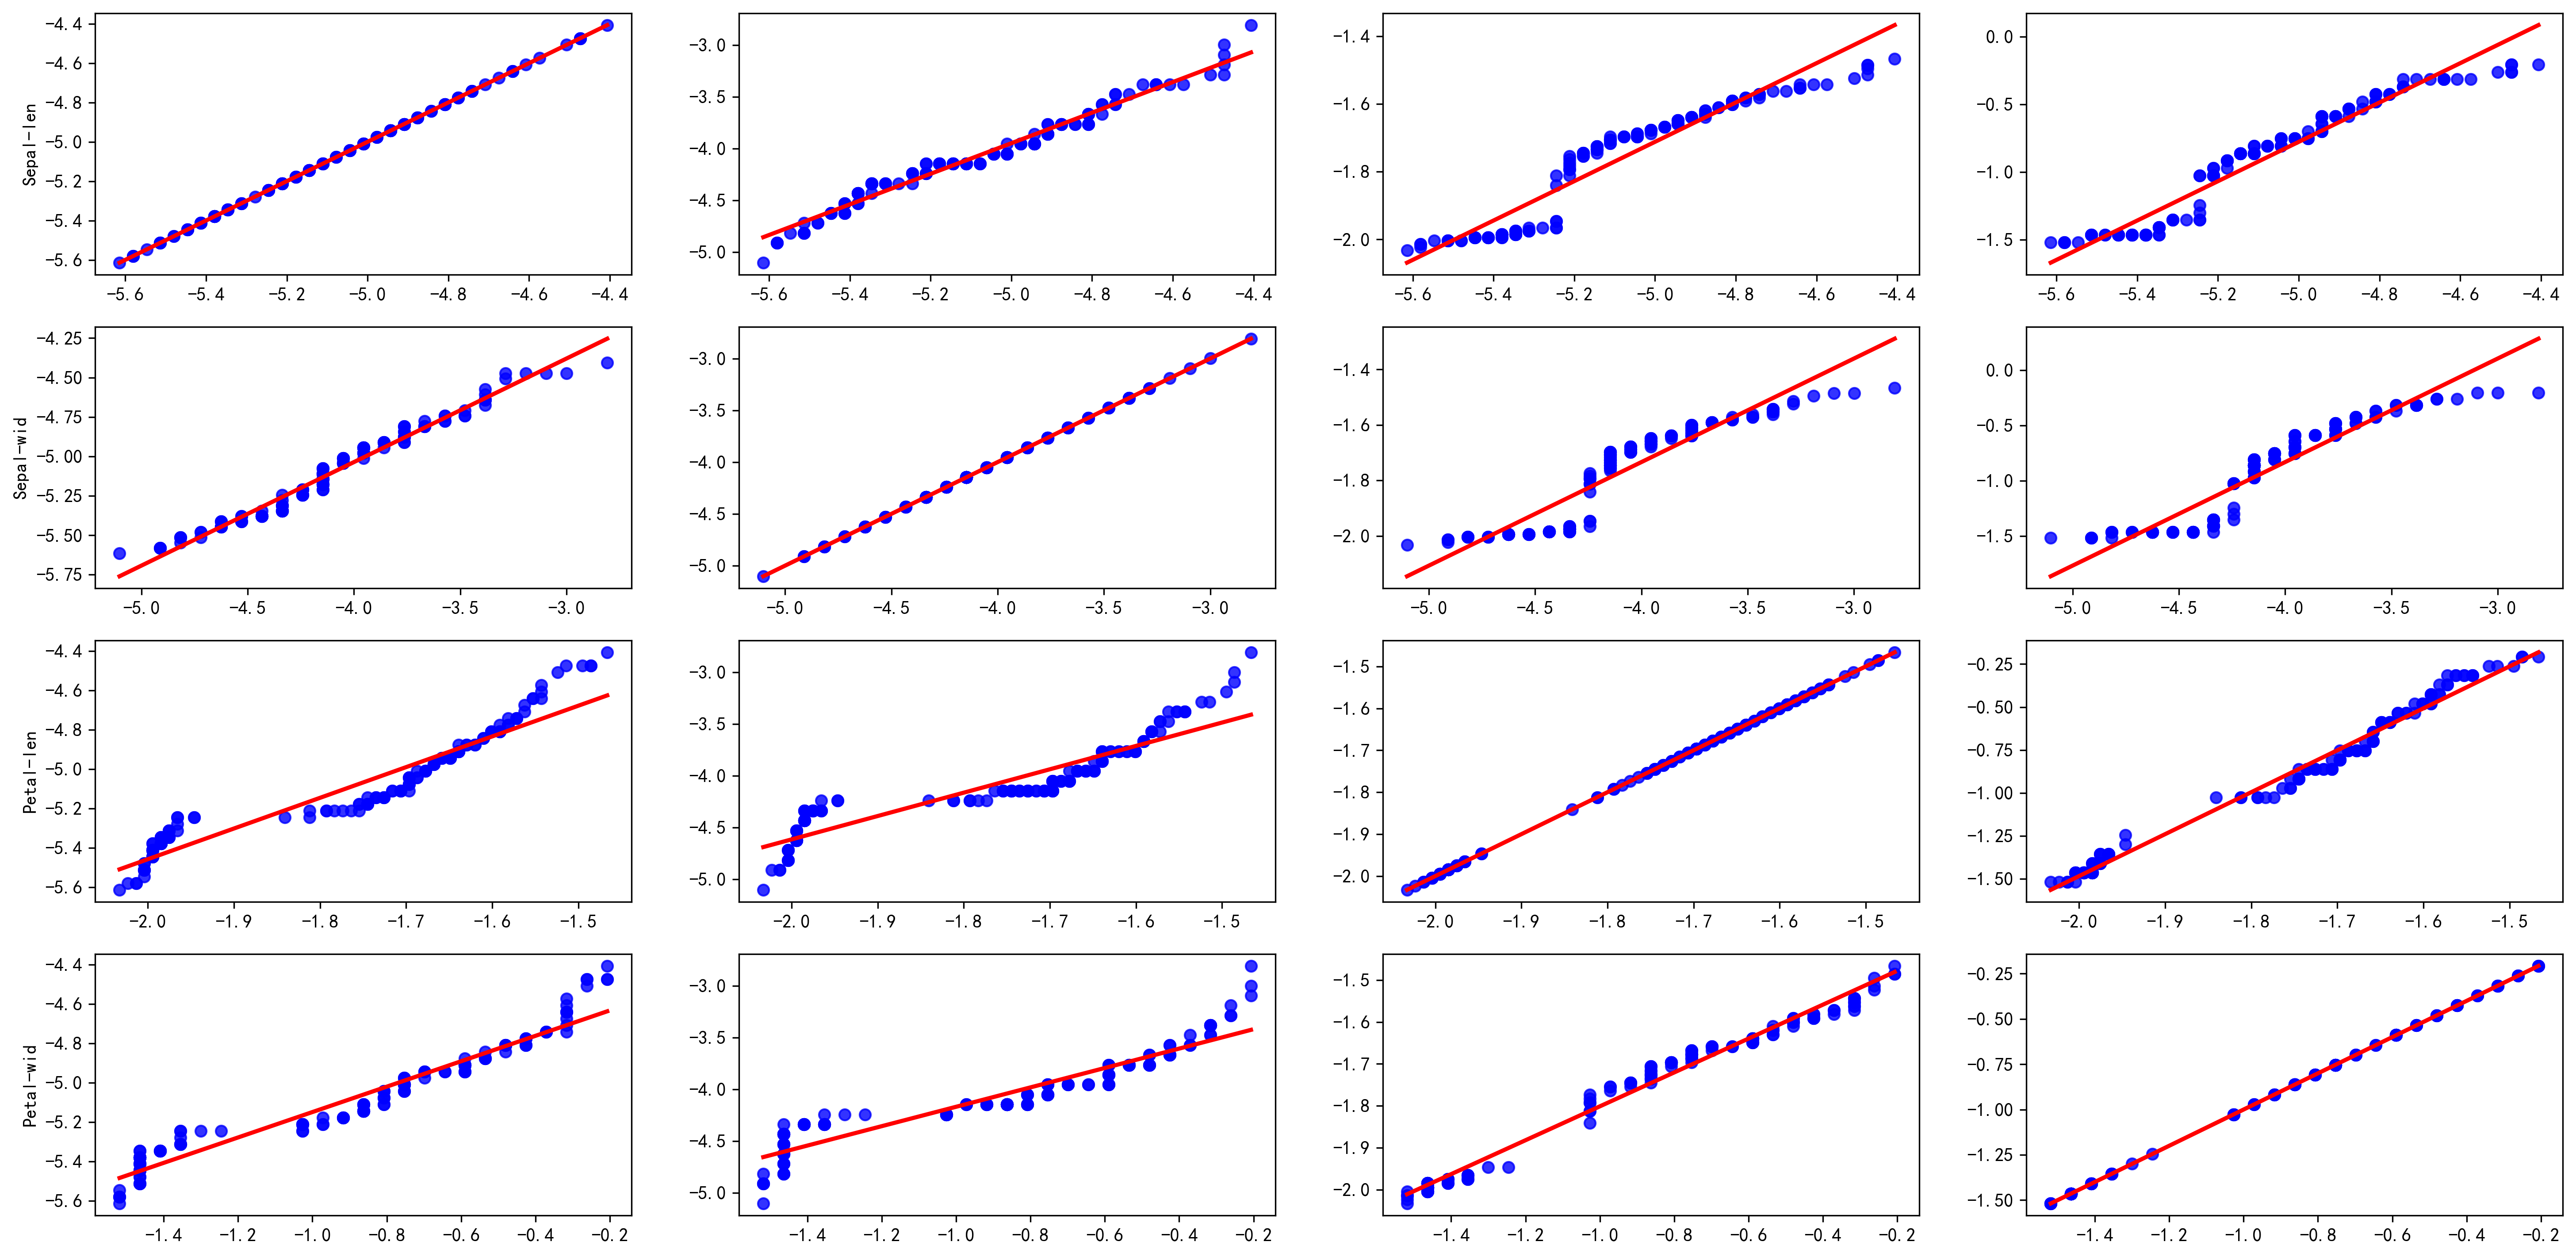

In [184]:
# 绘制不同变量间的分布图
# 4种变量
ls1 = sorted(slen)
ls2 = sorted(swid)
ls3 = sorted(plen)
ls4 = sorted(pwid)
name = ["Sepal-len","Sepal-wid","Petal-len","Petal-wid"]
# q-q矩阵图
def q_q_matrix(X):
    plt.figure(dpi=300,figsize=(24,12))
    for i in range(4):
        for j in range(4):
            plt.subplot(4,4,i*4+j+1)
            sns.regplot(x=pd.Series(X[i]),y=pd.Series(X[j]),ci=None, color="b",line_kws={"color":"r"})
            if (j== 0):
                plt.ylabel(name[i])
        
    plt.show()


q_q_matrix(np.vstack((ls1,ls2,ls3,ls4)))
# 最大最小归一
ls1 = ls1 / (max(slen)-min(slen))
ls2 = ls2 / (max(swid)-min(swid))
ls3 = ls3 / (max(plen)-min(plen))
ls4 = ls4 / (max(pwid)-min(pwid))
q_q_matrix(np.vstack((ls1,ls2,ls3,ls4)))
# 0均值归一
ls1 = (ls1 - np.mean(slen)) / np.std(slen,ddof=1)
ls2 = (ls2 - np.mean(swid)) / np.std(swid,ddof=1)
ls3 = (ls3 - np.mean(plen)) / np.std(plen,ddof=1)
ls4 = (ls4 - np.mean(pwid)) / np.std(pwid,ddof=1)
q_q_matrix(np.vstack((ls1,ls2,ls3,ls4)))

150
150 150


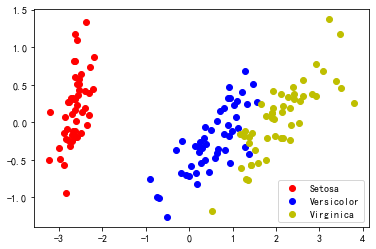

In [183]:
# PCA降维
from sklearn.decomposition import PCA
Y = X.T # X是四行，Y是四列
pca = PCA(n_components=2)   # 将为2维
pca.fit(Y)
data_2c = pca.transform(Y)
print(len(data_2c))


x = data_2c[:,0]
y = data_2c[:,1]
print(len(x),len(y))
plt.scatter(x[0:50],y[0:50],color='r',label="Setosa")
plt.scatter(x[50:100],y[50:100],color='b',label='Versicolor')
plt.scatter(x[100:150],y[100:150],color='y',label='Virginica')
plt.legend()
plt.show()
